# Qiskit 사용법 강의

안녕하세요, 
이 노트북은 기본적인 Qiskit 사용법을 익히기 위한 노트북입니다. 간단한 양자회로를 Qiskit 라이브러리를 이용해 구성하고 사용하는 방법을 배우고 이전에 Johri 박사님과 함께 다루었던 GHZ 상태를 만드는 양자회로를 다시 한 번 복습할 것입니다.

### Qiskit 과 Backend 설치

Python 환경에 익숙하지 않은 분들은 다음 셀을 실행해서 Qiskit과 IonQ backend 라이브러리를 설치하실 수 있습니다.

In [1]:
## 이 cell에 커서를 두고 shift + enter로 실행하세요.
# IonQ backend 설치
!curl https://static.ionq.co/c501c899-8b6a-4aa3-8c51-1c4193943954/qiskit_ionq_provider-0.0.1.dev0%2Bd5a56c7-py3-none-any.whl -O -J
!pip install qiskit_ionq_provider-0.0.1.dev0%2Bd5a56c7-py3-none-any.whl
# Qiskit 설치
!pip install qiskit

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 42174  100 42174    0     0  42174      0  0:00:01  0:00:01 --:--:-- 27261


Processing d:\ionq\qiskit_ionq_provider-0.0.1.dev0%2bd5a56c7-py3-none-any.whl
  Using cached numpy-1.19.5-cp36-cp36m-win_amd64.whl (13.2 MB)
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24079 sha256=c4c86782cfe9786c4ed85f3e969b6e15799f3f1cab877cb0f6030feb62c268e8
  Stored in directory: c:\users\junki\appdata\local\pip\cache\wheels\c2\e2\65\6222764e3e5b677acdb04b592abab7e15140a70baace656d81
Successfully built python-constraint
  Using cached Cython-0.29.22-cp36-cp36m-win_amd64.whl (1.6 MB)
  Created wheel for qiskit: filename=qiskit-0.24.1-py3-none-any.whl size=2917 sha256=9f8852b5c07e4de9f2fbc9251e9ffe520d8f61c0e322000b42a9df33abc0d337
  Stored in directory: c:\users\junki\appdata\local\pip\cache\wheels\a7\ae\61\af15b7b7d24ac8476692a65f85f6c59aadfac55f08e229001f
  Created wheel for docplex: filename=docplex-2.15.194-py3-none-any.whl size=645114 sha256=b05eeea9e937740d0101cb1e9f2000a39d008038812ef7d0e515c36875560e0f
  Stored in direct

In [2]:
# Matplotlib, pylatexenc 설치 - 양자회로 Visualization에 필요
!pip install matplotlib
!pip install pylatexenc
# qsphere를 위한 visualization
!pip install seaborn

  Created wheel for pylatexenc: filename=pylatexenc-2.9-py3-none-any.whl size=131520 sha256=c56be31cb07f704333205eceb2731ed19f789f838f987dab5c3d6d8626b359dd
  Stored in directory: c:\users\junki\appdata\local\pip\cache\wheels\84\d0\5c\ed2150a3c34975a838f090f35c1f1012541ba0b6c3d551cc0e
Successfully built pylatexenc


In [3]:
token_ionq = '94fROwsIfZ2W5r6e3JbECmeiridtFWIG'

## 양자회로 QuantumCircuit

Qiskit에서 양자회로는 `QuantumCircuit` 클래스로 표현됩니다. 회로 초기화, 양자 게이트 추가 및 측정을 다뤄보겠습니다.

In [4]:
# QuantumCircuit을 import합니다.
from qiskit import QuantumCircuit
# Quantum Circuit을 작성
qc = QuantumCircuit(3)  # 3 qubit 양자회로를 만듭니다.

# 주어진 양자회로를 그려봅니다.
qc.draw()

Matplotlib is building the font cache; this may take a moment.


q_0: 
     
q_1: 
     
q_2:

In [5]:
# 양자 게이트들을 추가해보겠습니다.
qc.h(0)         # 0번 큐비트에 hadamard 게이트를 가합니다.
qc.cx(0,1)      # CNOT 게이트를 가합니다. Control 큐비트 0번 , Target 큐비트 1번
qc.cx(0,2)      # CNOT 게이트를 가합니다. Control 큐비트 0번 , Target 큐비트 2번

qc.draw()

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

In [13]:
# 측정은 다음과 같이 합니다.
qc.measure_all()

qc.draw()

┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────■───░─┤M├──────
        └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──┼───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

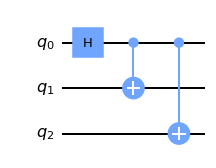

In [7]:
# matplotlib을 이용하면 좀 더 이쁜 QuantumCircuit을 그릴수 있습니다.
qc.draw('mpl') 

### 알아두면 좋은 것들

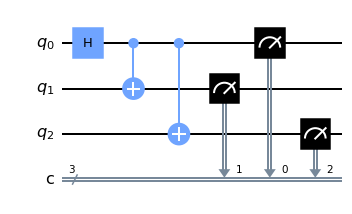

In [8]:
# 처음 Quantum Circuit을 만들때 Classical registre를 할당하면 직접 어떤 큐빗의 정보가 어떤 레지스터에 저장될지 할당할 수 있습니다.
qc = QuantumCircuit(3, 3)  # 3 qubit + 3 classcal register 양자회로를 만듭니다.

# 양자 게이트들을 추가해보겠습니다.
qc.h(0)         # 0번 큐비트에 hadamard 게이트를 가합니다.
qc.cx(0,1)      # CNOT 게이트를 가합니다. Control 큐비트 0번 , Target 큐비트 1번
qc.cx(0,2)      # CNOT 게이트를 가합니다. Control 큐비트 0번 , Target 큐비트 2번

qc.measure((0,1,2), (0,1,2)) # i번 큐비트의 정보를 i번째 레지스터에 측정하여 저장합니다.

qc.draw('mpl')

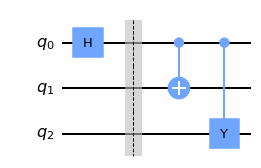

In [9]:
# QuantumCircuit은 서로 더할 수 있습니다.
qc1 = QuantumCircuit(3)
qc1.h(0)
qc1.barrier()

qc2 = QuantumCircuit(3)
qc2.cx(0,1)
qc2.cy(0,2)

qc = qc1 + qc2
qc.draw('mpl')

In [17]:
# 양자게이트의 개수는 다음 함수로 불러올수 있습니다.
qc.size()

3

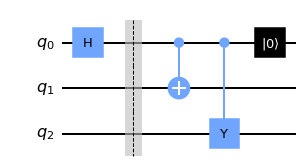

In [10]:
# 큐비트를 개별적으로 초기화할 수도 있습니다.
qc.reset(0)
qc.draw('mpl')

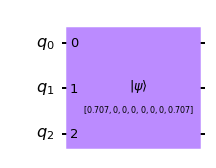

In [11]:
# 임의의 큐비트 백터 상태로 초기화하고 싶을 때는 `initialize` 함수를 이용합니다.
import numpy as np
qc = QuantumCircuit(3)
qc.initialize([1,0,0,0,0,0,0,1]/np.sqrt(2), [0,1,2])
qc.draw('mpl')

## Backend 와 Job

작성한 양자회로는 Backend를 이용해서 구동합니다. Backend는 양자회로를 구동할 수 있는 하드웨어나 시뮬레이터 소프트웨어를 말합니다. 주어진 양자회로를 수행하고 결과값을 출력해줍니다. IonQ 하드웨어를 사용하려면 IonQ 백엔드를 사용하고, 그 외에 하드웨어나 시뮬레이터를 사용하려면 해당하는 백엔드를 불러와서 사용하면 됩니다.

Qiskit은 기본적으로 여러가지의 양자회로 시뮬레이터를 Backend로 제공합니다. Qiskit 라이브러리의 여러 시뮬레이터를 먼저 알아보고 IonQ의 Backend를 활용하는 법을 배워보겠습니다.

In [12]:
# qiskit.Aer 라이브러리를 불러옵니다.
from qiskit import Aer

Aer.backends()

[QasmSimulator(
 backend_name='qasm_simulator', provider=AerProvider()),
 StatevectorSimulator(
 backend_name='statevector_simulator', provider=AerProvider()),
 UnitarySimulator(
 backend_name='unitary_simulator', provider=AerProvider()),
 PulseSimulator(
 backend_name='pulse_simulator', provider=AerProvider())]

`qiskit.Aer`에서 기본적으로 제공하는 시뮬레이터는 총 4가지가 있습니다. 기본적으로 사용자의 컴퓨터에서 로컬하게 계산을 하기 때문에 간단한 연산확인에 유용합니다.

* `QasmSimulator`는 실제 하드웨어의 작동을 모사합니다. 측정을 포함한 양자회로의 연산을 여러번 수행한뒤 측정값의 통계분포를 결과값으로 출력합니다.
* `StatevectorSimulator`는 양자상태를 벡터형태로 기술하여 양자회로를 계산합니다.
* `UnitarySimulator`는 유니터리 연산자 형태로 전체 양자회로를 계산합니다. 측정/큐비트 리셋은 사용할 수 없습니다.
* `PulseSimulator`는 qiskit.pulse를 위해 사용됩니다. 오늘 강의에서는 다루지 않습니다.

무엇을 골라야 할지 잘 모르겠으면 `QasmSimulator`를 이용하면 될 것 같습니다. 오늘은 `QasmSimulator`만 짧게 다루고 넘어가겠습니다.

In [13]:
# GHZ 상태를 만드는 양자회로를 반환하는 함수를 미리 정의하겠습니다.
def ghz_circuit(n: int):
    assert isinstance(n, int) and n > 0
    qc = QuantumCircuit(n)
    qc.h(0)
    if n>1: 
        qc.cx(0, range(1,n))
    qc.measure_all()
    return qc

백엔드에서 양자회로를 수행하기 위해서는 두 가지 방법이 있습니다. `execute`를 사용하거나 직접 `backend.run` 함수를 사용하는 방법입니다.

`execute` 함수는 백엔드의 설정에 맞춰서 transpile을 자동적으로 수행합니다. `QuantumCircuit` 클래스로 양자 회로를 만들어서 실행하면 백엔드에 맞추어서 트랜스파일을 한 뒤 실행해줍니다.

In [14]:
# 회로를 실행하기 위한 `execute`함수를 불러옵니다.
from qiskit import execute

# Qubit 3개짜리 GHZ 상태를 만드는 양자회로를 만듭니다.
qc = ghz_circuit(3)

# QasmSimulator 백엔드를 불러옵니다.
backend = Aer.get_backend('qasm_simulator')

# 양자회로는 다음과 같이 수행합니다. `execute` 함수는 Job 오브젝트를 반환합니다.
job = execute(qc, backend)

백엔드는 `Job` 오브젝트를 반환하여 연산의 수행상태와 결과를 확인할 수 있습니다. 반환되는 `job` 오브젝트를 꼭 저장해두는 것이 좋습니다.

In [15]:
# 연산의 진행상태는 다음 함수로 확인가능합니다.
job.status()

<JobStatus.DONE: 'job has successfully run'>

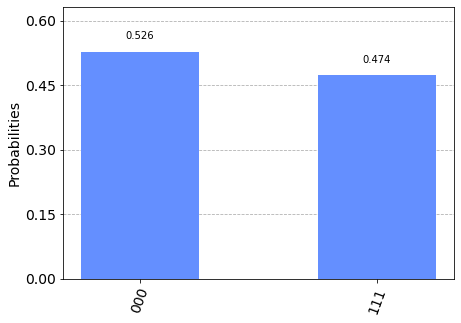

In [16]:
# 연산 결과는 `result` 함수로 확인가능합니다.
result = job.result()

# 측정 결과를 히스토그램으로 그려보겠습니다.
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts())

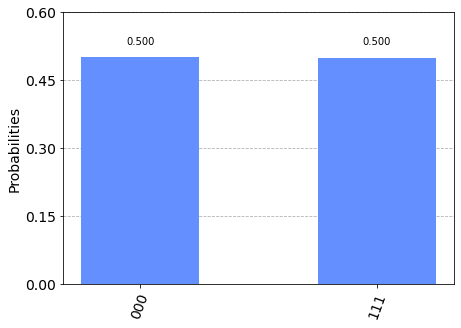

In [17]:
# excute 함수는 여러 run_config 변수들을 받습니다. 이 변수들을 활용해서 연산설정을 변경할 수 있습니다.

# 측정을 10만번을 수행하고, statevector simulation 방법을 사용하고, single (16bit) 정확도로 연산을 수행하는 옵션입니다.
job = execute(qc, backend, shots = 10e5, method = 'statevector', precision = 'single') 

plot_histogram(job.result().get_counts())

`job` 오브젝트는 진행상태를 확인하기 위한 다양한 함수를 제공합니다.

In [18]:
# job id는 다음과 같이 확인합니다.
job.job_id()

# job 상태는 다음 함수로 확인합니다.
print(job.status())

# job 상태를 확인할때 유용한 함수들입니다.
print('job.done: ', job.done())
print('job.running: ', job.running())
print('job.in_final_state: ', job.in_final_state())

JobStatus.DONE
job.done:  True
job.running:  False
job.in_final_state:  True


In [19]:
# Job이 너무 오래 걸리거나 회로에 버그가 있을때는 다음과 같이 취소할 수 있습니다.
job = execute(qc, backend, shots = 10e5)
job.cancel()
job.status()

<JobStatus.CANCELLED: 'job has been cancelled'>

`Result` 오브젝트는 연산 결과에 대한 정보를 담고 있습니다. `QasmSimulator`의 경우 측정 카운트에 대한 정보만 담고 있지만 백엔드 시뮬레이터의 종류에 따라 보다 자세한 정보를 포함하고 있을때도 있습니다.

In [20]:
# Bell 상태를 만드는 양자회로를 생각해봅시다. (측정 X)
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

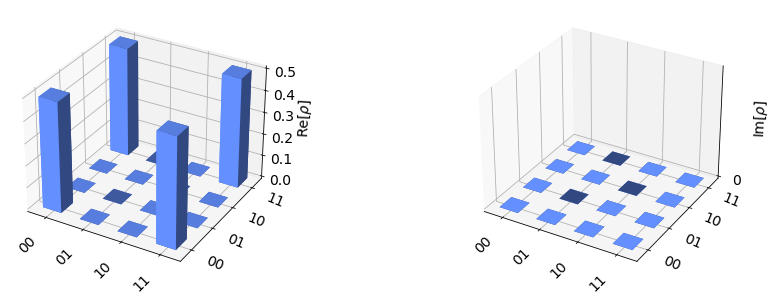

In [21]:
# vector의 density matrix를 확인하고 싶을 때 사용하는 visualization 툴입니다.
from qiskit.visualization import plot_state_city

# statevector simulator를 사용하면 `get_statevector` 함수를 이용할 수 있습니다.
backend = Aer.get_backend('statevector_simulator')

job = execute(qc, backend)

result = job.result()

vector = result.get_statevector()
plot_state_city(vector)

In [23]:
# unitary simulator를 이용하면 `get_unitary` 함수를 사용할 수 있습니다.
backend = Aer.get_backend('unitary_simulator')

job = execute(qc, backend)

result = job.result()

unitary = result.get_unitary()
print(unitary)

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]]


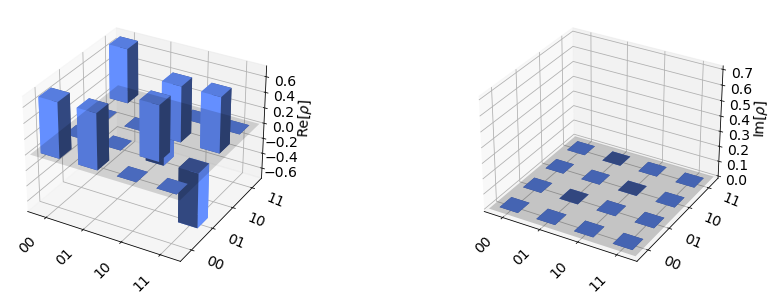

In [24]:
plot_state_city(unitary)

직접 스케쥴을 만들어서 실행을 하고 싶을 경우 `backend.run()` 함수를 이용할 수 있습니다. 백엔드가 `BaseBackend`일 경우 `assemble` 함수를 이용해서 양자회로를 한번 변환하는 절차가 필요합니다.

In [25]:
# Aer 기본 시뮬레이터들은 BaseBackend class에 해당합니다.
from qiskit.providers import Backend, BaseBackend
backend = Aer.get_backend('qasm_simulator')
print('Backend?: ', isinstance(backend, Backend))
print('BaseBackend?: ', isinstance(backend, BaseBackend))

Backend?:  False
BaseBackend?:  True


In [26]:
# 트랜스파일, 어샘블을 직접 해주어야합니다.
from qiskit import transpile, assemble

qc = ghz_circuit(3)

t_qc = transpile(qc)
qobj = assemble(t_qc)

# 회로를 backend에서 수행합니다.
job = backend.run(qobj)

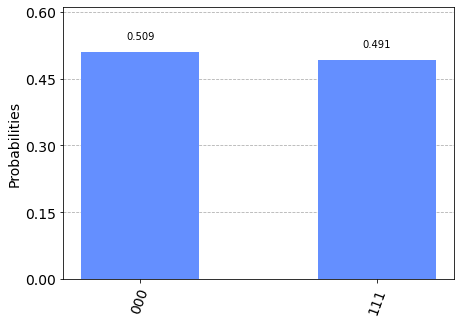

In [27]:
# 결과 출력 방법은 동일합니다.
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### IonQ Backend

IonQ backend를 사용하려면 인증 토큰이 필요합니다. backend를 불러온 뒤에는 위에서 본 시뮬레이터와 비슷하게 사용하면 됩니다.

In [28]:
from qiskit_ionq_provider import IonQProvider 

# Provider를 불러옵니다.
provider = IonQProvider(token=token_ionq)

In [29]:
provider.backends()

[<IonQSimulatorBackend('ionq_simulator')>, <IonQQPUBackend('ionq_qpu')>]

IonQ backend는 시뮬레이터 백엔드 ('ionq_simulator')와 QPU 하드웨어 백엔드 ('ionq_qpu') 두 가지가 제공됩니다. Qiskit Aer 시뮬레이터와 다르게 ionq_simulator는 ionq 서버에서 연산을 수행하고 결과를 네트워크로 돌려줍니다.

In [30]:
backend = provider.get_backend('ionq_simulator')

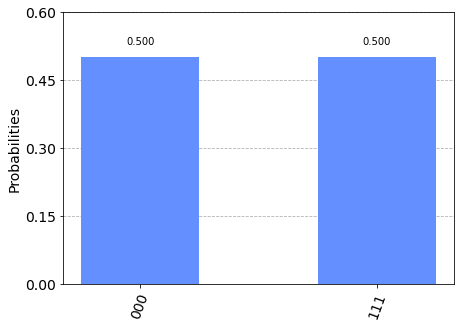

In [31]:
qc = ghz_circuit(3)
job = backend.run(qc, shots=1000)

job.wait_for_final_state()  # job이 끝날때까지 기다립니다.
result = job.result()

plot_histogram(result.get_counts())

In [52]:
backend = provider.get_backend('ionq_qpu')

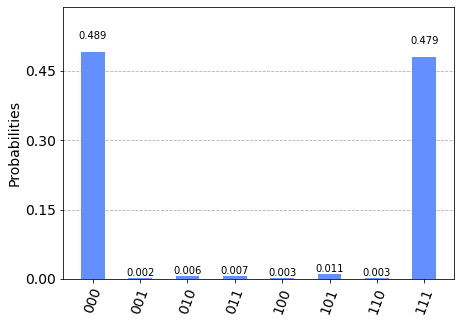

In [53]:
qc = ghz_circuit(3)
job = backend.run(qc, shots=1000)

job.wait_for_final_state()  # job이 끝날때까지 기다립니다.
result = job.result()

plot_histogram(result.get_counts())

## 양자회로의 Visualization

Qiskit은 양자회로의 다양한 시각화 툴을 제공합니다.

앞서 본 `plot_histogram`, `plot_state_city` 외에 어떤 시각화 툴이 있는지 알아보겠습니다.

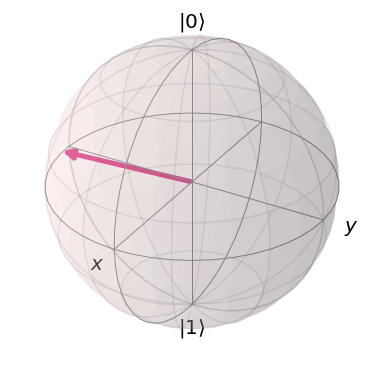

In [38]:
# Bloch vector의 시각화입니다.
from qiskit.visualization import plot_bloch_vector

vec = [np.pi/2, 0, 1]  # theta, pi, radius
plot_bloch_vector(vec)

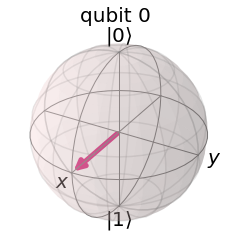

In [39]:
# 양자회로의 vector 상태를 이용하여 bloch vector를 그리려면 `plot_bloch_multivector`를 사용합니다.
from qiskit.visualization import plot_bloch_multivector

backend = Aer.get_backend('statevector_simulator')
qc = QuantumCircuit(1)
qc.h(0)
job = execute(qc, backend)
vec = job.result().get_statevector()

plot_bloch_multivector(vec)

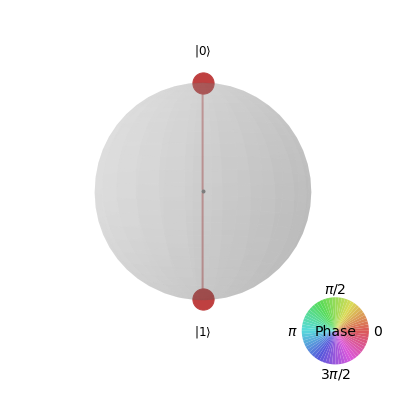

In [40]:
# Qsphere도 유용하게 사용됩니다.
from qiskit.visualization import plot_state_qsphere

plot_state_qsphere(vec)

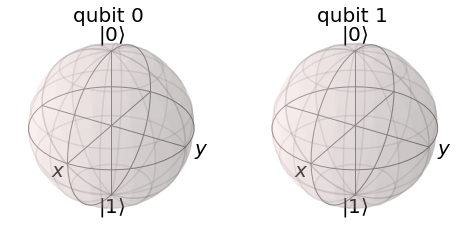

In [41]:
## Qsphere는 multi-qubit entangled state에서 강점이 있습니다.

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

# 다음 함수도 양자회로에서 State vector를 얻어내는데에 사용가능합니다.
from qiskit.quantum_info import Statevector
vec = Statevector.from_instruction(qc)

# 두 개 이상의 큐비트 상태는 Bloch vector로 표현하면 그 의미가 모호합니다.
plot_bloch_multivector(vec)

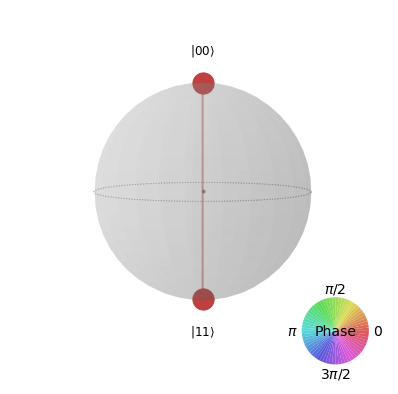

In [42]:
# QSphere는 보다 직관적인 이해를 도와줍니다.
plot_state_qsphere(vec)

## Cat state (GHZ state) 만들어보기

위에서도 살펴보았고, 지난번 Sonika 박사님과도 실습해보았던 고양이 상태 또는 GHZ 상태를 만들어 봅시다.

Hadamard 게이트는 $|0\rangle$ 상태를 $(|0\rangle + |1\rangle)/\sqrt{2}$ 의 중첩상태로 바꿔줍니다. 이 Hadamard gate와 CNOT 게이트들을 활용해서 임의의 $n$ 큐비트에 대해서 $(|00...0\rangle + |11....1\rangle)/\sqrt{2}$ 상태를 만들수 있습니다. 이런 상태를 GHZ (Greenberger–Horne–Zeilinger) 상태 또는 거시적 양자 중첩상태이기 때문에 Cat 상태라고도 합니다.

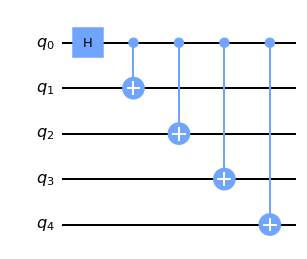

In [43]:
# GHZ 상태를 만드는 양자회로(측정 x)를 반환하는 함수를 미리 정의하겠습니다.
def ghz_circuit_wo_measure(n: int):
    assert isinstance(n, int) and n > 1
    qc = QuantumCircuit(n)
    qc.h(0)
    qc.cx(0, range(1,n))
    return qc

# 큐비트 갯수를 정합니다.
qubit_number = 5

qc = ghz_circuit_wo_measure(qubit_number)
qc.draw('mpl')

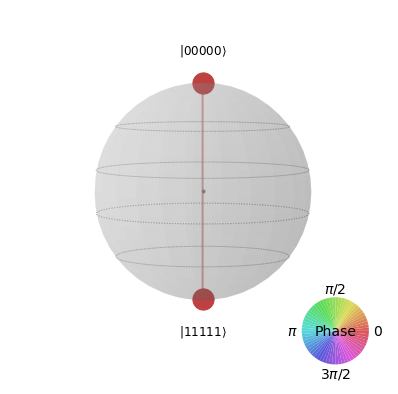

In [44]:
vec = Statevector.from_instruction(qc)
plot_state_qsphere(vec)

In [45]:
backend = provider.get_backend('ionq_simulator')

In [ ]:
backend = provider.get_backend('ionq_qpu')

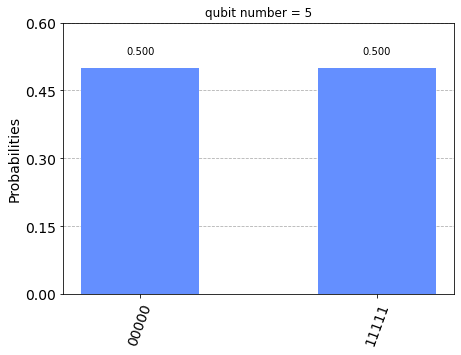

In [49]:
# 큐비트 숫자를 바꿔가면서 회로를 만들어서 이온큐 시뮬레이터나 실제 하드웨어에서 확인해 볼 수 있습니다.
qubit_number = 5
qc = ghz_circuit(qubit_number)
job = backend.run(qc, shots=1000)

job.wait_for_final_state()
result = job.result()

plot_histogram(result.get_counts(), title = f'qubit number = {qubit_number:d}')

## quantum teleportation